In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
employee_data = pd.read_csv('HR_comma_sep.csv')
employee_data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [109]:
employee_data.shape

(14999, 10)

In [110]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [111]:
employee_data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

## Data Undestanding and Initial checks

'''
1. Target Column ---> Left
2. salary --> Ordinal
3. Work_accident --> Binary
4. promotion_last_5years -- > Binary
5. Department --> nominal Categorical

6. Numercical Columns --- >  satisfaction_level,last_evaluation,average_montly_hours,time_spend_company 


'''

In [112]:
## Retained class of employees % is higher and it dominates the churned class emp

employee_data['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

Text(0.5, 1.0, 'Churn vs Retained Distribution')

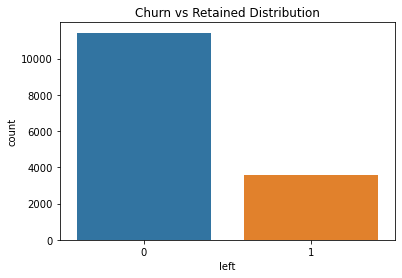

In [113]:
sns.countplot(x='left',data = employee_data)
import matplotlib.pyplot as plt
plt.title("Churn vs Retained Distribution")

In [114]:
employee_data.groupby(by = 'number_project',as_index = False).agg(total_emp = ('left','count'))

number_project  total_emp
0               2       2388
1               3       4055
2               4       4365
3               5       2761
4               6       1174
5               7        256

In [115]:
## NO missing value in the data

employee_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [116]:
employee_data.groupby(by = 'number_project',as_index = False).agg(total_emp = ('left','sum'))

number_project  total_emp
0               2       1567
1               3         72
2               4        409
3               5        612
4               6        655
5               7        256

In [117]:
employee_data['average_montly_hours'].describe()['75%']+1.5*(employee_data['average_montly_hours'].describe()['75%']-employee_data['average_montly_hours'].describe()['25%'])

378.5

<AxesSubplot:xlabel='average_montly_hours'>

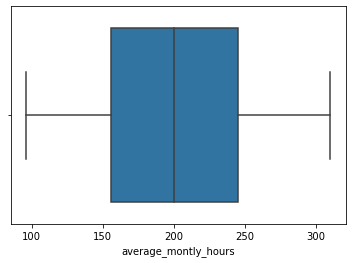

In [118]:
sns.boxplot(x='average_montly_hours', data=employee_data)

<AxesSubplot:xlabel='left', ylabel='average_montly_hours'>

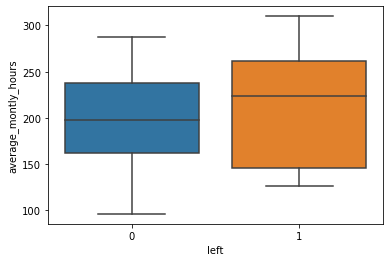

In [119]:
sns.boxplot(x='left', y='average_montly_hours', data=employee_data)

In [120]:
q3 = employee_data['average_montly_hours'].describe()['75%']
q1 = employee_data['average_montly_hours'].describe()['25%']
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

outlier = employee_data[(employee_data['average_montly_hours']<lower_bound)|(employee_data['average_montly_hours']>upper_bound)]
outlier

Empty DataFrame
Columns: [satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, left, promotion_last_5years, Department, salary]
Index: []

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

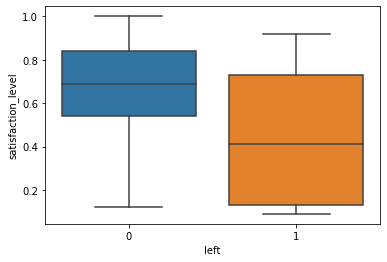

In [121]:
sns.boxplot(x='left', y='satisfaction_level', data=employee_data)

'''
# Satisfaction level of churned employees are lesser than the retianed ones.

'''

<AxesSubplot:xlabel='left', ylabel='last_evaluation'>

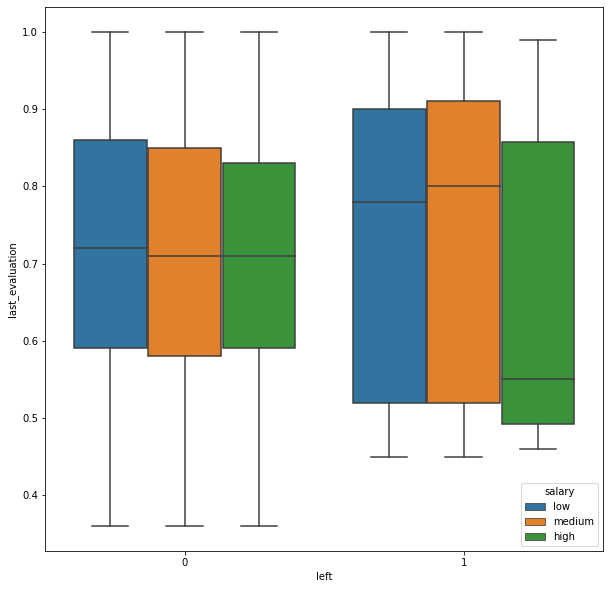

In [122]:
plt.figure(figsize = (10,10))
sns.boxplot(x='left', y='last_evaluation',hue = 'salary',hue_order=['low', 'medium', 'high'],data=employee_data)

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

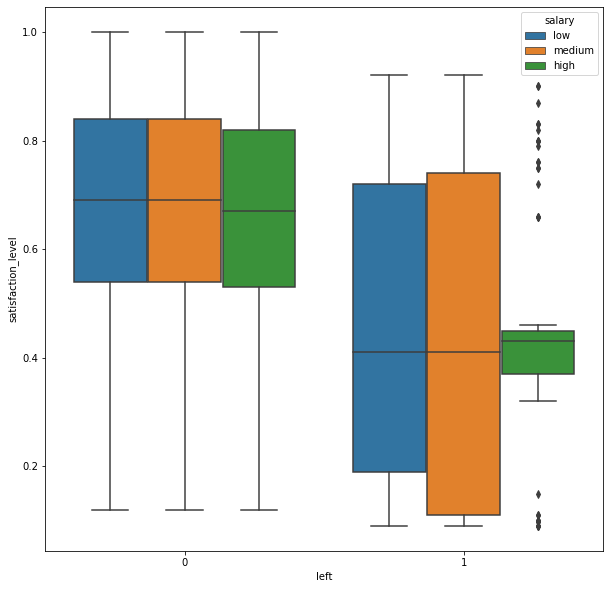

In [123]:
plt.figure(figsize = (10,10))
sns.boxplot(x='left', y='satisfaction_level', hue = 'salary', hue_order = ['low', 'medium', 'high'] ,data=employee_data)

<AxesSubplot:xlabel='Department', ylabel='count'>

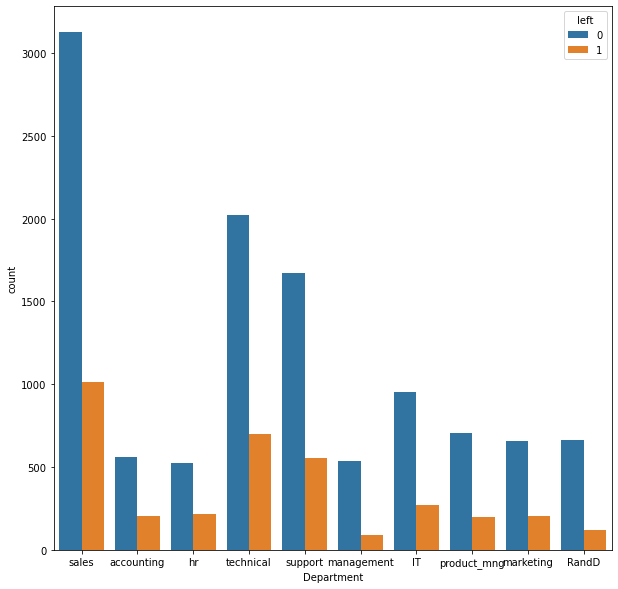

In [124]:
plt.figure(figsize = (10,10))
sns.countplot(x='Department', hue='left', data=employee_data)

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

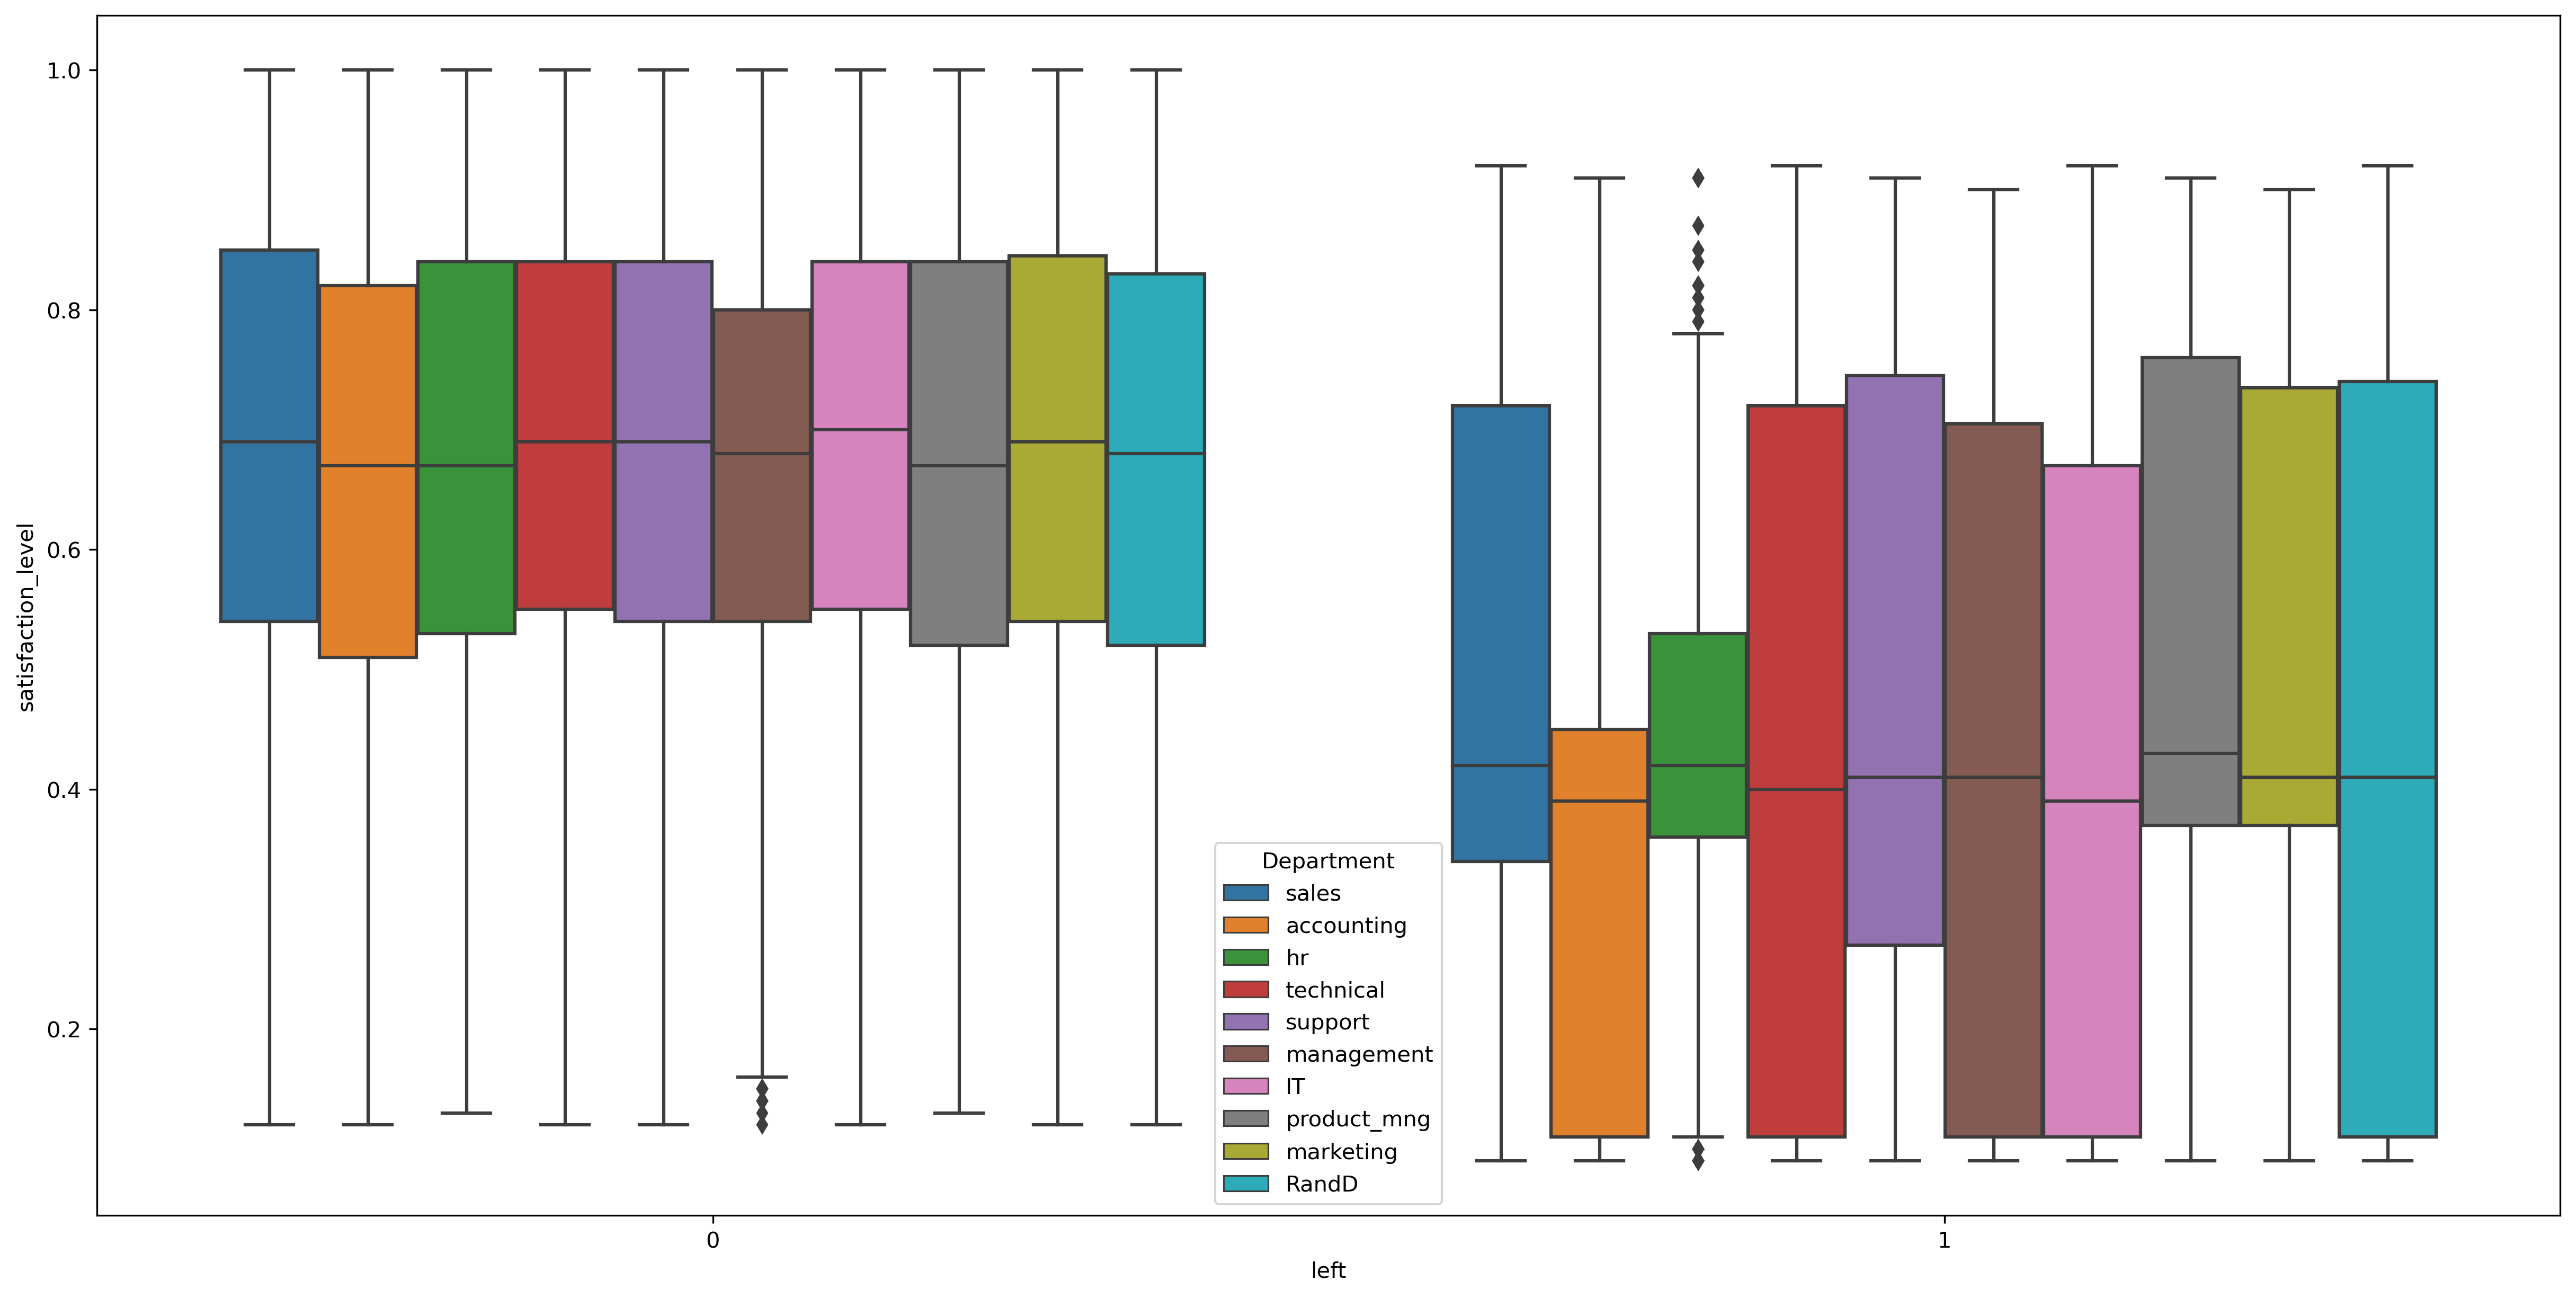

In [125]:
plt.figure(figsize = (20,10),dpi =300)
sns.boxplot(x='left', y='satisfaction_level',hue = 'Department',data=employee_data)

## Categorical Value
number_project             6
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3

In [126]:
employee_data[:5]

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [127]:
employee_data.groupby('salary')['left'].mean()
employee_data.groupby('Department')['left'].mean()

Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

In [128]:
employee_data.groupby('salary')['left'].mean()

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

In [129]:
employee_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [130]:
employee_data['project_bin']= pd.cut(employee_data['number_project'],bins =3,labels = ['low','med','High'])
employee_data['time_spend_bin']= pd.cut(employee_data['time_spend_company'],bins =3,labels = ['low','med','High'])

In [131]:
from scipy.stats import chi2_contingency
tab = pd.crosstab(employee_data['salary'], employee_data['left'])
chi2, p, dof, expected  = chi2_contingency(tab)
chi2, p, dof, expected

(381.22504706621066,
 1.652086749295958e-83,
 2,
 array([[ 942.49189946,  294.50810054],
        [5574.18814588, 1741.81185412],
        [4911.31995466, 1534.68004534]]))

In [132]:
from scipy.stats import chi2_contingency
def correlation_test(employee_data):
    p_dic = {}
    lis_cat = ['project_bin','time_spend_bin','Work_accident','promotion_last_5years','Department','salary']
    for col in lis_cat:
        tab = pd.crosstab(employee_data[col],employee_data['left'])
        chi2, p, dof, expected = chi2_contingency(tab)
        p_dic[col]=p
    return p_dic

In [133]:
p_dic = correlation_test(employee_data)
p_dic

{'project_bin': 0.0,
 'time_spend_bin': 1.2465593587167307e-154,
 'Work_accident': 9.55823958002199e-80,
 'promotion_last_5years': 6.344155457918697e-14,
 'Department': 7.042130463822518e-15,
 'salary': 1.652086749295958e-83}

<AxesSubplot:xlabel='time_spend_company', ylabel='left'>

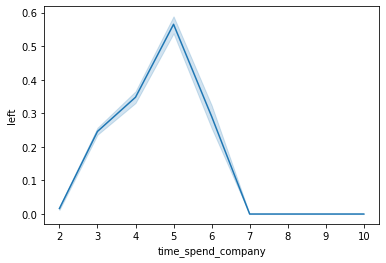

In [134]:
sns.lineplot(x='time_spend_company',y='left',data=employee_data)

<AxesSubplot:xlabel='number_project', ylabel='left'>

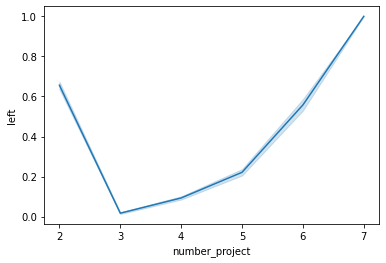

In [135]:
sns.lineplot(x='number_project',y='left',data=employee_data)

In [136]:
from sklearn.model_selection import train_test_split

X = employee_data.drop('left', axis=1)
y = employee_data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
X_train.shape

(11999, 11)

In [138]:
X_test.shape

(3000, 11)

In [139]:
X_train[:5]

satisfaction_level  last_evaluation  number_project  \
9838                1.00             0.61               3   
7689                0.16             0.78               4   
6557                0.80             0.80               3   
6872                0.66             0.86               4   
820                 0.11             0.93               7   

      average_montly_hours  time_spend_company  Work_accident  \
9838                   188                   4              0   
7689                   196                   5              0   
6557                   175                   2              0   
6872                   112                   6              0   
820                    284                   4              0   

      promotion_last_5years   Department  salary project_bin time_spend_bin  
9838                      0  product_mng     low         low            low  
7689                      0    technical    high         med            med  
6557                      0        RandD  medium         low            low  
6872                      0   accounting  medium         med            med  
820                       0    technical     low        High            low

In [140]:
en_col = ['Department','salary','project_bin','time_spend_bin']
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
OHE.fit_transform(X_train[en_col])
X_train_encoded = pd.DataFrame(data = OHE.fit_transform(X_train[en_col]),columns = OHE.get_feature_names_out(en_col),index=X_train.index)
X_train_final =pd.concat([X_train,X_train_encoded],axis =1).drop(['Department','salary','project_bin','time_spend_bin'],axis =1)
X_test_encoded = pd.DataFrame(data = OHE.transform(X_test[en_col]),columns = OHE.get_feature_names_out(en_col),index=X_test.index)
X_test_final =pd.concat([X_test,X_test_encoded],axis =1).drop(['Department','salary','project_bin','time_spend_bin'],axis =1)
X_train_final

satisfaction_level  last_evaluation  number_project  \
9838                 1.00             0.61               3   
7689                 0.16             0.78               4   
6557                 0.80             0.80               3   
6872                 0.66             0.86               4   
820                  0.11             0.93               7   
...                   ...              ...             ...   
5191                 0.52             0.96               4   
13418                0.49             0.65               4   
5390                 0.66             0.73               5   
860                  0.79             1.00               4   
7270                 0.98             0.86               2   

       average_montly_hours  time_spend_company  Work_accident  \
9838                    188                   4              0   
7689                    196                   5              0   
6557                    175                   2              0   
6872                    112                   6              0   
820                     284                   4              0   
...                     ...                 ...            ...   
5191                    246                   3              0   
13418                   233                   7              0   
5390                    249                   2              0   
860                     218                   5              0   
7270                    219                   4              0   

       promotion_last_5years  Department_RandD  Department_accounting  \
9838                       0               0.0                    0.0   
7689                       0               0.0                    0.0   
6557                       0               1.0                    0.0   
6872                       0               0.0                    1.0   
820                        0               0.0                    0.0   
...                      ...               ...                    ...   
5191                       0               0.0                    0.0   
13418                      0               0.0                    0.0   
5390                       0               0.0                    0.0   
860                        0               0.0                    0.0   
7270                       0               0.0                    0.0   

       Department_hr  ...  Department_product_mng  Department_sales  \
9838             0.0  ...                     1.0               0.0   
7689             0.0  ...                     0.0               0.0   
6557             0.0  ...                     0.0               0.0   
6872             0.0  ...                     0.0               0.0   
820              0.0  ...                     0.0               0.0   
...              ...  ...                     ...               ...   
5191             0.0  ...                     0.0               0.0   
13418            0.0  ...                     0.0               1.0   
5390             0.0  ...                     0.0               0.0   
860              0.0  ...                     0.0               1.0   
7270             0.0  ...                     0.0               1.0   

       Department_support  Department_technical  salary_low  salary_medium  \
9838                  0.0                   0.0         1.0            0.0   
7689                  0.0                   1.0         0.0            0.0   
6557                  0.0                   0.0         0.0            1.0   
6872                  0.0                   0.0         0.0            1.0   
820                   0.0                   1.0         1.0            0.0   
...                   ...                   ...         ...            ...   
5191                  1.0                   0.0         1.0            0.0   
13418                 0.0                   0.0         0.0            1.0   
5390                  1.0            

In [141]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X_train_scaled = std_sc.fit_transform(X_train_final)
X_test_scaled = std_sc.transform(X_test_final)

In [142]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(k_neighbors=5,random_state=42)
X_train_balance,y_train_balance = SMOTE.fit_resample(X_train_scaled,y_train)

C:\Users\kamle\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_balance)
X_test_pca = pca.transform(X_test_scaled)

In [144]:
pca.explained_variance_

array([4.54296149, 2.11066168, 1.90158471, 1.43258691, 1.32437047,
       1.20845972, 1.11881455, 1.0988906 , 1.08849799, 1.07580711,
       0.97466104, 0.92601744, 0.7920558 , 0.75746672, 0.68776253,
       0.46436918])

In [145]:
np.cumsum(pca.explained_variance_ratio_)

array([0.20348799, 0.29802859, 0.38320423, 0.44737255, 0.50669365,
       0.56082289, 0.61093675, 0.66015817, 0.70891409, 0.75710156,
       0.80075851, 0.84223661, 0.87771431, 0.9116427 , 0.94244891,
       0.9632489 ])

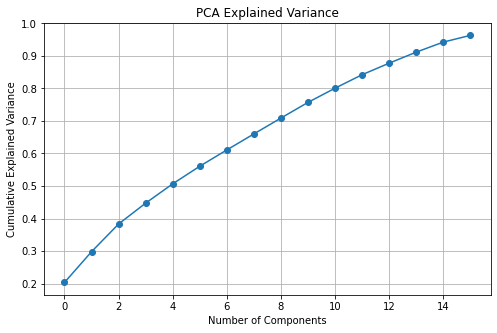

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [147]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train_pca,y_train_balance)

LogisticRegression()

In [148]:
from sklearn.metrics import classification_report
y_pred_new = lor.predict(X_test_pca)
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2294
           1       0.53      0.87      0.66       706

    accuracy                           0.79      3000
   macro avg       0.74      0.81      0.75      3000
weighted avg       0.85      0.79      0.80      3000



In [149]:
lor.coef_[0]

array([ 0.09050521,  0.10764752,  0.39078719, -1.27762897, -0.09251116,
        0.01111489,  0.09285763,  0.0741113 , -0.08749581,  0.04870306,
       -0.3071173 ,  0.05929939, -0.34943687, -0.33735346,  0.02845487,
       -0.06706133])

In [150]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_pca)  # add intercept
model = sm.Logit(y_train_balance, X_train_const)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.497247
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                18268
Model:                          Logit   Df Residuals:                    18251
Method:                           MLE   Df Model:                           16
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.2826
Time:                        10:49:53   Log-Likelihood:                -9083.7
converged:                       True   LL-Null:                       -12662.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0713      0.019     -3.754      0.000      -0.108      -0.034
x1             0.0906      0.

In [151]:
from sklearn.metrics import classification_report
print("Train score:", classification_report(y_train_balance, lor.predict(X_train_pca)))
print("Test score:", classification_report(y_test, lor.predict(X_test_pca)))



Train score:               precision    recall  f1-score   support

           0       0.86      0.76      0.81      9134
           1       0.79      0.88      0.83      9134

    accuracy                           0.82     18268
   macro avg       0.82      0.82      0.82     18268
weighted avg       0.82      0.82      0.82     18268

Test score:               precision    recall  f1-score   support

           0       0.95      0.76      0.84      2294
           1       0.53      0.87      0.66       706

    accuracy                           0.79      3000
   macro avg       0.74      0.81      0.75      3000
weighted avg       0.85      0.79      0.80      3000



In [152]:
## Training the Decision tree Model on this
X_train

satisfaction_level  last_evaluation  number_project  \
9838                 1.00             0.61               3   
7689                 0.16             0.78               4   
6557                 0.80             0.80               3   
6872                 0.66             0.86               4   
820                  0.11             0.93               7   
...                   ...              ...             ...   
5191                 0.52             0.96               4   
13418                0.49             0.65               4   
5390                 0.66             0.73               5   
860                  0.79             1.00               4   
7270                 0.98             0.86               2   

       average_montly_hours  time_spend_company  Work_accident  \
9838                    188                   4              0   
7689                    196                   5              0   
6557                    175                   2              0   
6872                    112                   6              0   
820                     284                   4              0   
...                     ...                 ...            ...   
5191                    246                   3              0   
13418                   233                   7              0   
5390                    249                   2              0   
860                     218                   5              0   
7270                    219                   4              0   

       promotion_last_5years   Department  salary project_bin time_spend_bin  
9838                       0  product_mng     low         low            low  
7689                       0    technical    high         med            med  
6557                       0        RandD  medium         low            low  
6872                       0   accounting  medium         med            med  
820                        0    technical     low        High            low  
...                      ...          ...     ...         ...            ...  
5191                       0      support     low         med            low  
13418                      0        sales  medium         med            med  
5390                       0      support  medium         med            low  
860                        0        sales     low         med            med  
7270                       0        sales     low         low            low  

[11999 rows x 11 columns]

In [153]:
en_col = ['Department','salary','project_bin','time_spend_bin']
X_train[en_col].nunique()

Department        10
salary             3
project_bin        3
time_spend_bin     3
dtype: int64

In [154]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(random_state=40)
X_train_bal_data,y_train_bal_data = SMOTE.fit_resample(X_train_final,y_train)

C:\Users\kamle\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [155]:
from sklearn.model_selection import train_test_split

X = employee_data.drop('left', axis=1)
y = employee_data['left']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train['left'] = y_train
X_test['left'] = y_test

In [156]:
en_col = ['Department','salary','project_bin','time_spend_bin']
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore')
X_train_encoded = pd.DataFrame(data = OHE.fit_transform(X_train[en_col]),columns = OHE.get_feature_names_out(en_col),index=X_train.index)
X_train_final =pd.concat([X_train,X_train_encoded],axis =1).drop(['Department','salary','project_bin','time_spend_bin'],axis =1)
X_test_encoded = pd.DataFrame(data = OHE.transform(X_test[en_col]),columns = OHE.get_feature_names_out(en_col),index=X_test.index)
X_test_final =pd.concat([X_test,X_test_encoded],axis =1).drop(['Department','salary','project_bin','time_spend_bin'],axis =1)
X_train_final[:5]

satisfaction_level  last_evaluation  number_project  \
9838                1.00             0.61               3   
7689                0.16             0.78               4   
6557                0.80             0.80               3   
6872                0.66             0.86               4   
820                 0.11             0.93               7   

      average_montly_hours  time_spend_company  Work_accident  \
9838                   188                   4              0   
7689                   196                   5              0   
6557                   175                   2              0   
6872                   112                   6              0   
820                    284                   4              0   

      promotion_last_5years  left  Department_RandD  Department_accounting  \
9838                      0     0               0.0                    0.0   
7689                      0     0               0.0                    0.0   
6557                      0     0               1.0                    0.0   
6872                      0     0               0.0                    1.0   
820                       0     1               0.0                    0.0   

      ...  Department_product_mng  Department_sales  Department_support  \
9838  ...                     1.0               0.0                 0.0   
7689  ...                     0.0               0.0                 0.0   
6557  ...                     0.0               0.0                 0.0   
6872  ...                     0.0               0.0                 0.0   
820   ...                     0.0               0.0                 0.0   

      Department_technical  salary_low  salary_medium  project_bin_low  \
9838                   0.0         1.0            0.0              1.0   
7689                   1.0         0.0            0.0              0.0   
6557                   0.0         0.0            1.0              1.0   
6872                   0.0         0.0            1.0              0.0   
820                    1.0         1.0            0.0              0.0   

      project_bin_med  time_spend_bin_low  time_spend_bin_med  
9838              0.0                 1.0                 0.0  
7689              1.0                 0.0                 1.0  
6557              0.0                 1.0                 0.0  
6872              1.0                 0.0                 1.0  
820               0.0                 1.0                 0.0  

[5 rows x 23 columns]

In [157]:
## 1st train the random forest model on imbalance data --> X_train_final, check the model perforamce,

In [158]:
## PERFORM THE ROW SMAPLING, COLUMN SAMPLING AND HYBRID APPROACH.
import random
class DataSampler:
    def __init__(self,df,sample_size,sample_col):
        self.df = df
        self.sample_size = sample_size
        self.sample_col = sample_col
    def row_without_replace(self):
        if self.sample_size<len(self.df):
            return self.df.iloc[random.sample(range(len(self.df)),self.sample_size)]
        else:
            raise ValueError("sample size greater than dataframe's length")
    def row_with_replace(self):
            return self.df.sample(n=self.sample_size,replace = True,random_state =42)
        
    def without_column_sample(self):
        if len(list(self.df.columns))>self.sample_col:
            return self.df[random.sample(list(self.df.columns),self.sample_col)]
        else:
            raise ValueError("sample col is greater than total column")
    
    def hybrid(self,with_row):
        ## Row sampling 
        if with_row == False and self.sample_size<len(self.df):
            row_df = self.df.iloc[random.sample(range(len(self.df)),self.sample_size)]
        if with_row == True:
            row_df = self.df.sample(n=self.sample_size,replace = True,random_state =42)
        ## Column Sampling
            randm_col = random.sample(list(self.df.columns),self.sample_col)
        return row_df[randm_col]

In [159]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
class train_dt:
    def __init__(self,n,x_test):
        self.n= n
        self.x_test = x_test
        self.trees = []
        self.model = []
        self.feature_set = []
    ## Create the method to generate the decision tree 
    def gen_tree(self):
        for i in range(self.n):
            samp = DataSampler(X_train_final,6000,len(X_train_final.columns))
            random_sample = samp.hybrid(True)
            dtc = DecisionTreeClassifier()
            features = random_sample.drop('left',axis =1)
            dtc.fit(features,random_sample['left'])
            self.trees.append(dtc)
            self.feature_set.append(features.columns)
        return self.model
    def predict(self):
        all_pred = []
        for i in range(len(self.trees)):
            all_pred.append(self.trees[i].predict(self.x_test[self.feature_set[i]]))
        return all_pred

In [160]:
dec_train = train_dt(5,X_test_final)
tr = dec_train.gen_tree()
pr = dec_train.predict()
pr

[array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64)]

In [161]:
merged_df = pd.concat([X_test_final.reset_index(drop=True),pd.DataFrame(pr).T],axis=1).rename(columns = {0:"0th tree",1:"1st tree",2:"2nd tree",3:"3rd tree",4:"4th tree"})
final_pred, _ = mode(merged_df[['0th tree',"1st tree","2nd tree","3rd tree","4th tree"]].values, axis=1)
merged_df['predict_val'] = final_pred

In [162]:
def check_fun(x):
    if x['left']!=x['predict_val']:
        x['diff'] = x['left']-x['predict_val']
    else:
        x['diff'] = 0
    return x
df = merged_df.apply(check_fun, axis=1)


In [163]:
from sklearn.metrics import accuracy_score
pred = merged_df['predict_val']
actual = merged_df['left']

accuracy_score(actual,pred)


0.967

In [164]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(actual,pred)
recall = recall_score(actual,pred)

In [165]:
accuracy_score(actual,pred),precision,recall

(0.967, 0.9366906474820144, 0.9220963172804533)

In [166]:
from sklearn.metrics import classification_report
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2294
           1       0.94      0.92      0.93       706

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier(n_estimators = 10,max_depth = 10, max_features = 'sqrt',criterion = 'gini',bootstrap = True,random_state = 42)

In [168]:
rf.fit(X_train_final.drop("left", axis=1), X_train_final["left"])
pred_ = rf.predict(X_test_final.drop("left", axis=1))
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2294
           1       0.98      0.93      0.95       706

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



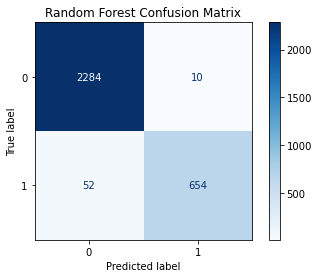

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# True labels
y_true = X_test_final["left"]

# Predicted labels
y_pred = rf.predict(X_test_final.drop("left", axis=1))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [170]:
train_label =X_train_final['left']
train_label_feature= X_train_final.drop('left',axis =1)
train_pred_=rf.predict(train_label_feature)
train_pred_

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [171]:
print("Train Accuracy:", accuracy_score(train_label, train_pred_))

Train Accuracy: 0.9844987082256855


In [172]:
test_label = X_test_final['left']
test_label_feature= X_test_final.drop('left',axis =1)
test_pred_=rf.predict(test_label_feature)
print("Test Accuracy:", accuracy_score(test_label, test_pred_.ravel()))

Test Accuracy: 0.9793333333333333


In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grd = { 'n_estimators' :[5,10,15,20,30],
                'max_depth': [3, 10, 15,30,35],
                'criterion':['gini'],
                'max_features':['sqrt','log2'],
                'bootstrap':[True,False],
                'min_samples_split':[2, 5, 10],
                'min_samples_leaf' :[1,2,4]}


In [182]:
rf_grid = RandomForestClassifier(random_state = 42)

In [183]:
gdc = GridSearchCV(estimator = rf_grid,param_grid=param_grd,cv =5,scoring = 'accuracy',verbose = 2)
gdc.fit(train_label_feature,train_label)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, 

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_sampl

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_sam

[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_s

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, mi

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, 

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_s

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, 

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, 

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, 

[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_lea

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, 

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, 

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, 

[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, 

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=15, max_features=log2, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=log2, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_sampl

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=sqrt, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_l

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=35, max_features=log2, min_samples_l

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'max_depth': [3, 10, 15, 30, 35],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 20, 30]},
             scoring='accuracy', verbose=2)

In [184]:
gdc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 30}

In [180]:
gdc.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=15, n_estimators=10,
                       random_state=42)

In [ ]:
rf_grid.fit(param_gird)

In [214]:
grid_df = pd.DataFrame(gdc.cv_results_)
grid_df.sort_values(by ='rank_test_score',ascending = True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
774       0.203216      0.003765         0.010360        0.000290   
864       0.203958      0.017531         0.010439        0.000962   
729       0.210824      0.018216         0.009359        0.000160   
819       0.189046      0.007341         0.009257        0.000490   
409       0.161754      0.002219         0.009201        0.000234   
..             ...           ...              ...             ...   
80        0.018146      0.000636         0.003030        0.000034   
75        0.015730      0.000841         0.002778        0.000419   
40        0.015843      0.001010         0.002462        0.000525   
85        0.018556      0.000751         0.003480        0.000988   
35        0.015717      0.000601         0.003195        0.000162   

     param_bootstrap param_criterion  param_max_depth param_max_features  \
774            False            gini               30               log2   
864            False            gini               35               log2   
729            False            gini               30               sqrt   
819            False            gini               35               sqrt   
409             True            gini               35               log2   
..               ...             ...              ...                ...   
80              True            gini                3               log2   
75              True            gini                3               log2   
40              True            gini                3               sqrt   
85              True            gini                3               log2   
35              True            gini                3               sqrt   

     param_min_samples_leaf  param_min_samples_split  param_n_estimators  \
774                       1                        5                  30   
864                       1                        5                  30   
729                       1                        5                  30   
819                       1                        5                  30   
409                       1                        2                  30   
..                      ...                      ...                 ...   
80                        4                        5                   5   
75                        4                        2                   5   
40                        4                       10                   5   
85                        4                       10                   5   
35                        4                        5                   5   

                                                params  split0_test_score  \
774  {'bootstrap': False, 'criterion': 'gini', 'max...           0.987500   
864  {'bootstrap': False, 'criterion': 'gini', 'max...           0.987500   
729  {'bootstrap': False, 'criterion': 'gini', 'max...           0.987500   
819  {'bootstrap': False, 'criterion': 'gini', 'max...           0.987500   
409  {'bootstrap': True, 'criterion': 'gini', 'max_...           0.989583   
..                                                 ...                ...   
80   {'bootstrap': True, 'criterion': 'gini', 'max_...           0.855000   
75   {'bootstrap': True, 'criterion': 'gini', 'max_...           0.855000   
40   {'bootstrap': True, 'criterion': 'gini', 'max_...           0.855000   
85   {'bootstrap': True, 'criterion': 'gini', 'max_...           0.855000   
35   {'bootstrap': True, 'criterion': 'gini', 'max_...           0.855000   

     split1_test_score  split2_test_score  split3_test_score  \
774           0.989167           0.988333           0.991250   
864           0.989167           0.988333           0.991250   
729           0.989167           0.988333           0.991250   
819           0.989167           0.988333           0.991250   
409           0.988333           0.987917           0.988750   
..                 ...                ...

In [210]:
pra = grid_df[grid_df.sort_values(by ='rank_test_score',ascending = True)['rank_test_score']==1]['params']
for data in pra.tolist():
    print(data)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}


C:\Users\kamle\AppData\Local\Temp/ipykernel_14836/280972909.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pra = grid_df[grid_df.sort_values(by ='rank_test_score',ascending = True)['rank_test_score']==1]['params']


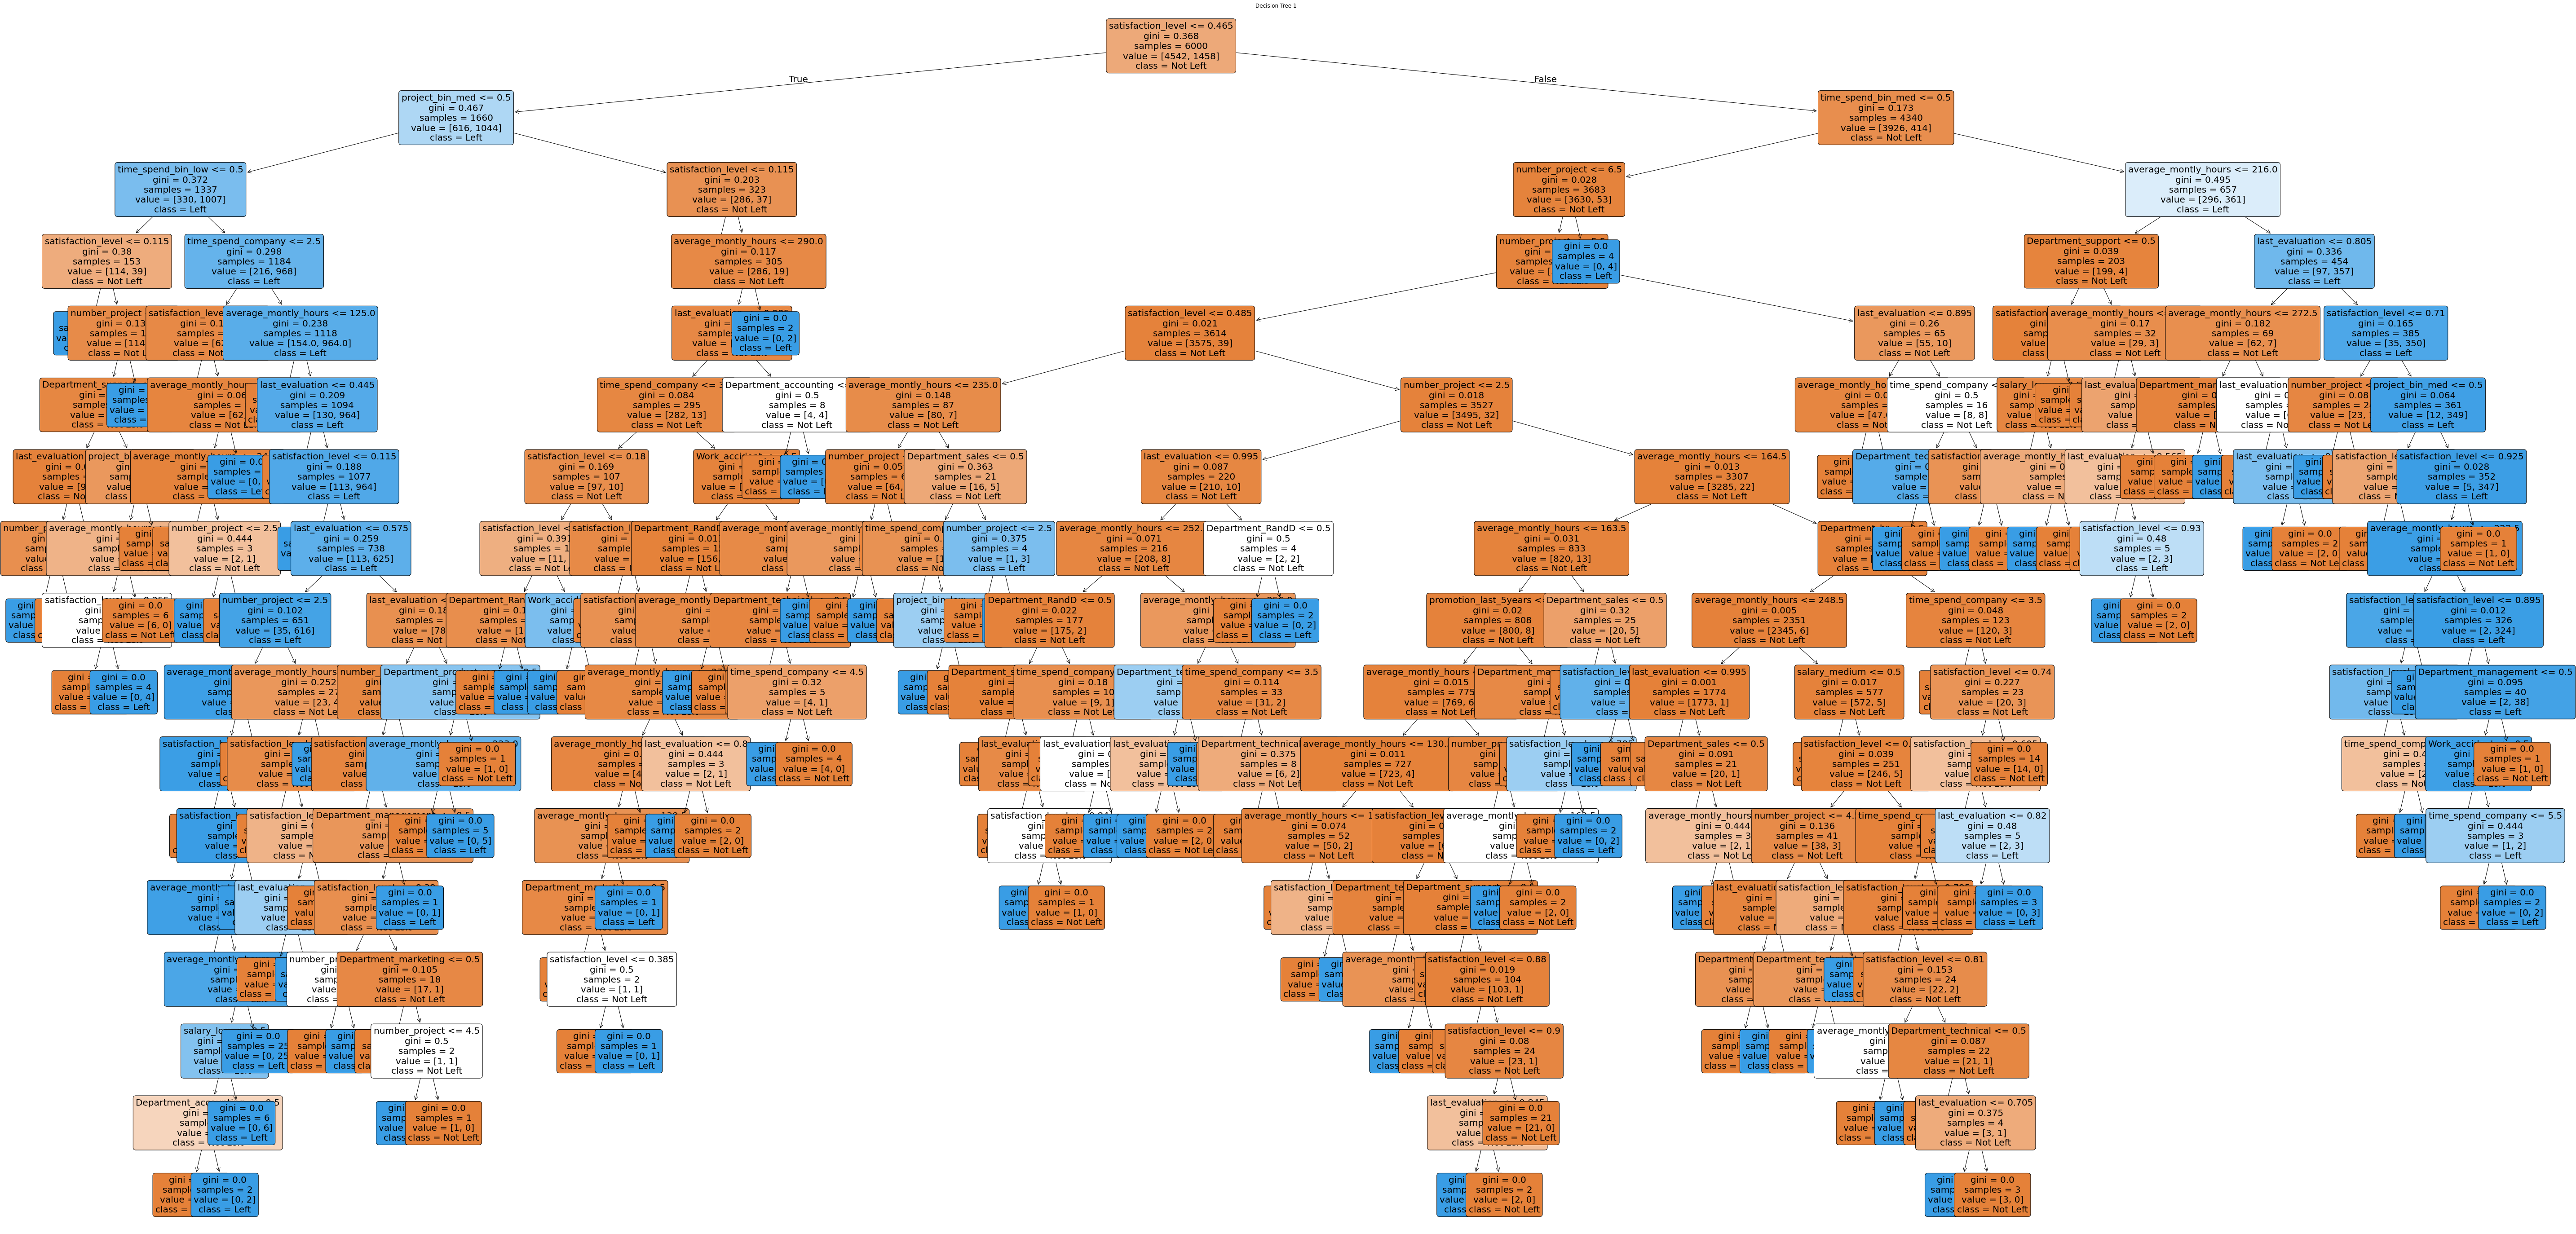

In [120]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 50))  # Adjust size as needed
plot_tree(tr[0], feature_names=tf[0], filled=True, rounded=True, fontsize=20, class_names=["Not Left", "Left"])
plt.title("Decision Tree 1")
plt.show()


In [ ]:
tdt = train_dt(samp,5,X_test_final)
feature_lst,tree = tdt.gen_tree()

## CODE END HERE ###

In [113]:
X_train_final.iloc[random.sample(range(len(X_train_final)),5000)]

satisfaction_level  last_evaluation  number_project  \
13609                0.84             0.53               3   
14494                0.10             0.93               6   
7111                 0.71             0.95               6   
14926                0.85             0.87               5   
9622                 0.80             0.70               3   
...                   ...              ...             ...   
961                  0.73             0.83               5   
12424                0.45             0.46               2   
84                   0.11             0.77               6   
13977                0.76             0.85               3   
13765                0.66             0.51               4   

       average_montly_hours  time_spend_company  Work_accident  \
13609                   210                   4              1   
14494                   289                   4              1   
7111                    204                   3              1   
14926                   245                   5              0   
9622                    238                   2              0   
...                     ...                 ...            ...   
961                     270                   5              1   
12424                   130                   3              0   
84                      291                   4              0   
13977                   192                   3              0   
13765                   254                   2              0   

       promotion_last_5years  Department_RandD  Department_accounting  \
13609                      0               0.0                    0.0   
14494                      0               0.0                    0.0   
7111                       0               0.0                    0.0   
14926                      0               0.0                    0.0   
9622                       0               0.0                    0.0   
...                      ...               ...                    ...   
961                        0               0.0                    0.0   
12424                      0               0.0                    0.0   
84                         0               0.0                    0.0   
13977                      0               0.0                    0.0   
13765                      0               0.0                    0.0   

       Department_hr  ...  Department_product_mng  Department_sales  \
13609            0.0  ...                     0.0               0.0   
14494            0.0  ...                     0.0               0.0   
7111             0.0  ...                     0.0               1.0   
14926            0.0  ...                     0.0               0.0   
9622             0.0  ...                     0.0               0.0   
...              ...  ...                     ...               ...   
961              0.0  ...                     0.0               0.0   
12424            0.0  ...                     0.0               0.0   
84               0.0  ...                     0.0               0.0   
13977            0.0  ...                     0.0               0.0   
13765            0.0  ...                     0.0               1.0   

       Department_support  Department_technical  salary_low  salary_medium  \
13609                 0.0                   0.0         0.0            1.0   
14494                 1.0                   0.0         1.0            0.0   
7111                  0.0                   0.0         0.0            1.0   
14926                 0.0                   1.0         1.0            0.0   
9622                  0.0                   1.0         0.0            1.0   
...                   ...                   ...         ...            ...   
961                   1.0                   0.0         0.0            1.0   
12424                 0.0                   1.0         1.0            0.0   
84                    0.0            

In [112]:
range(len(X_train_final))

range(0, 11999)

In [119]:
random.sample(range(len(X_train_final)),10)

[4259, 4798, 5609, 764, 5129, 8116, 4281, 6189, 288, 247]

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse_output = False)
dept_encoded_train = ohe.fit_transform(X_train[['Department']])
dept_encoded_test = ohe.transform(X_test[['Department']])
Dept_en_df_train=pd.DataFrame(dept_encoded_train,columns = ohe.get_feature_names_out(['Department']))
Dept_en_df_test = pd.DataFrame(dept_encoded_test,columns = ohe.get_feature_names_out(['Department']))
X_train = X_train.drop('Department',axis =1)
X_test = X_test.drop('Department',axis =1)
Dept_en_df_test.index = X_test.index
Dept_en_df_train.index = X_train.index
X_train_transformed = pd.concat([X_train,Dept_en_df_train],axis =1)
X_test_transformed = pd.concat([X_test,Dept_en_df_test],axis =1)

In [34]:
Dept_en_df_train = pd.DataFrame(dept_encoded_train, columns=ohe.get_feature_names_out(['Department']))

In [35]:
sal_map = {'low':0,'medium':1,'high':2}
X_train_transformed['salary']=X_train_transformed['salary'].map(sal_map)
X_test_transformed['salary']=X_test_transformed['salary'].map(sal_map)
X_test_transformed.drop(['project_bin','time_spend_bin'],axis =1,inplace = True)
X_train_transformed.drop(['project_bin','time_spend_bin'],axis =1,inplace = True)

<AxesSubplot:>

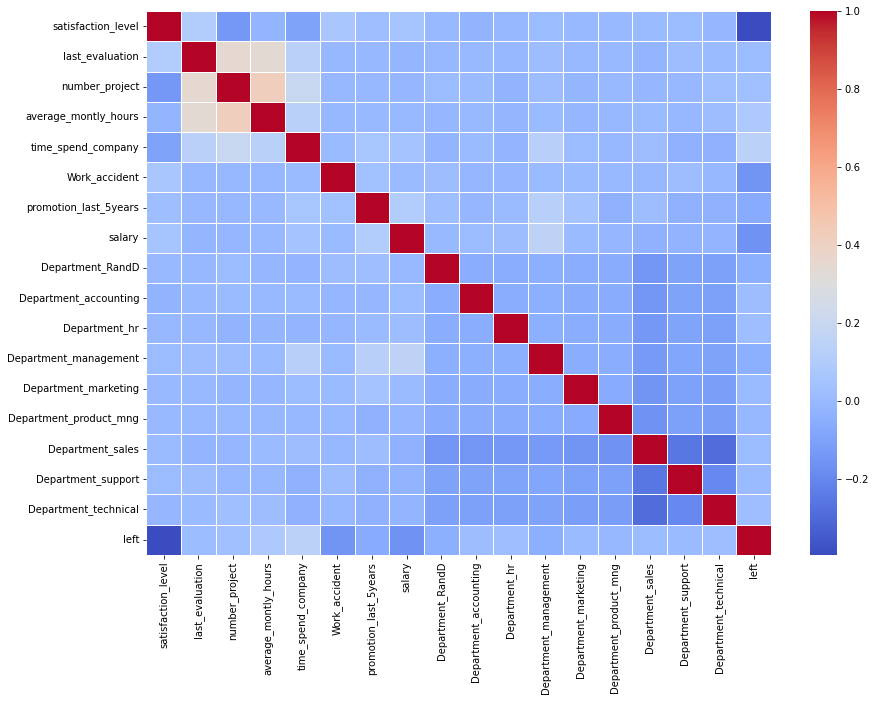

In [36]:
plt.figure(figsize=(14,10))
X_train_transformed.index = y_train.index
validate_df=pd.concat([X_train_transformed,y_train],axis =1)
sns.heatmap(validate_df.corr('pearson'),cmap='coolwarm',linewidths=0.5)

In [37]:
from sklearn.preprocessing import StandardScaler
std_sclr=StandardScaler()
X_train_scaled = std_sclr.fit_transform(X_train_transformed)
X_test_scaled = std_sclr.transform(X_test_transformed)

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [40]:
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7886666666666666

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[2117,  177],
       [ 457,  249]], dtype=int64)

## As there are Majority and Minority class in the dataset, leading to class imbalance, so need to do oversampling in the data.


In [222]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

C:\Users\kamle\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [43]:
X_resampled

array([[ 1.55539086, -0.61934644, -0.65341156, ..., -0.61810584,
        -0.41542618, -0.47026373],
       [-1.81839394,  0.37200735,  0.15695385, ..., -0.61810584,
        -0.41542618,  2.12646636],
       [ 0.75210876,  0.48863721, -0.65341156, ..., -0.61810584,
        -0.41542618, -0.47026373],
       ...,
       [-1.0106877 , -1.25622244, -1.46377697, ..., -0.61810584,
        -0.41542618, -0.47026373],
       [-2.04895389,  1.12787327,  2.58805008, ...,  1.61784591,
        -0.41542618, -0.47026373],
       [-0.6134708 , -1.02755094, -1.46377697, ...,  1.61784591,
        -0.41542618, -0.47026373]])

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression()
log_reg.fit(X_resampled,y_resampled)

LogisticRegression()

In [46]:
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2294
           1       0.50      0.80      0.61       706

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.76      0.78      3000



## AFTER USING THE SMOT THE RECALL HAS IMPROVED THIS SUGGEST THAT MODEL IS ABLE TO CATCH THE CHURNED EMPLOYEE AGGERESIVELY NOW.

In [230]:
X_train

satisfaction_level  last_evaluation  number_project  \
9838                 1.00             0.61               3   
7689                 0.16             0.78               4   
6557                 0.80             0.80               3   
6872                 0.66             0.86               4   
820                  0.11             0.93               7   
...                   ...              ...             ...   
5191                 0.52             0.96               4   
13418                0.49             0.65               4   
5390                 0.66             0.73               5   
860                  0.79             1.00               4   
7270                 0.98             0.86               2   

       average_montly_hours  time_spend_company  Work_accident  \
9838                    188                   4              0   
7689                    196                   5              0   
6557                    175                   2              0   
6872                    112                   6              0   
820                     284                   4              0   
...                     ...                 ...            ...   
5191                    246                   3              0   
13418                   233                   7              0   
5390                    249                   2              0   
860                     218                   5              0   
7270                    219                   4              0   

       promotion_last_5years   Department  salary project_bin time_spend_bin  
9838                       0  product_mng     low         low            low  
7689                       0    technical    high         med            med  
6557                       0        RandD  medium         low            low  
6872                       0   accounting  medium         med            med  
820                        0    technical     low        High            low  
...                      ...          ...     ...         ...            ...  
5191                       0      support     low         med            low  
13418                      0        sales  medium         med            med  
5390                       0      support  medium         med            low  
860                        0        sales     low         med            med  
7270                       0        sales     low         low            low  

[11999 rows x 11 columns]

In [231]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(drop = 'first',sparse_output = False)
sal_encoded_train = OHE.fit_transform(X_train[['salary']])
sal_encoded_test = OHE.transform(X_test[['salary']])

sal_en_train = pd.DataFrame(sal_encoded_train,columns = OHE.get_feature_names_out(['salary']))
sal_en_test = pd.DataFrame(sal_encoded_test,columns = OHE.get_feature_names_out(['salary']))
X_train.index = sal_en_train.index
X_test.index = sal_en_test.index

X_train_salary_en = pd.concat([X_train,sal_en_train],axis =1)
X_test_salary_en = pd.concat([X_test,sal_en_test],axis =1)


OHE = OneHotEncoder(drop = 'first',sparse_output = False)
project_bin_en_train=OHE.fit_transform(X_train[['project_bin']])
project_bin_en_test=OHE.transform(X_test[['project_bin']])
project_bin_en_train = pd.DataFrame(project_bin_en_train,columns = OHE.get_feature_names_out(['project_bin']))
project_bin_en_test = pd.DataFrame(project_bin_en_test,columns = OHE.get_feature_names_out(['project_bin']))
X_train_salary_en.index = project_bin_en_train.index
X_test_salary_en.index = project_bin_en_test.index
X_train_project_en = pd.concat([X_train_salary_en,project_bin_en_train],axis =1)
X_test_project_en = pd.concat([X_test_salary_en,project_bin_en_test],axis =1)


OHE = OneHotEncoder(drop = 'first',sparse_output = False)
time_spend_bin_train = OHE.fit_transform(X_train[['time_spend_bin']])
time_spend_bin_test = OHE.transform(X_test[['time_spend_bin']])
time_spent_bin_en_train = pd.DataFrame(time_spend_bin_train,columns = OHE.get_feature_names_out(['time_spend_bin']))
time_spent_bin_en_test = pd.DataFrame(time_spend_bin_test,columns = OHE.get_feature_names_out(['time_spend_bin']))
X_train_project_en.index = time_spent_bin_en_train.index
X_test_project_en.index = time_spent_bin_en_test.index

X_train_final = pd.concat([X_train_project_en,time_spent_bin_en_train],axis =1)
X_test_final = pd.concat([X_test_project_en,time_spent_bin_en_test],axis =1)
X_train_final.drop('')


In [232]:
X_train_final = X_train_final.drop(['salary','project_bin','time_spend_bin'],axis =1)
X_test_final = X_test_final.drop(['salary','project_bin','time_spend_bin'],axis =1)

In [233]:
X_train_final

satisfaction_level  last_evaluation  number_project  \
0                    1.00             0.61               3   
1                    0.16             0.78               4   
2                    0.80             0.80               3   
3                    0.66             0.86               4   
4                    0.11             0.93               7   
...                   ...              ...             ...   
11994                0.52             0.96               4   
11995                0.49             0.65               4   
11996                0.66             0.73               5   
11997                0.79             1.00               4   
11998                0.98             0.86               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       188                   4              0   
1                       196                   5              0   
2                       175                   2              0   
3                       112                   6              0   
4                       284                   4              0   
...                     ...                 ...            ...   
11994                   246                   3              0   
11995                   233                   7              0   
11996                   249                   2              0   
11997                   218                   5              0   
11998                   219                   4              0   

       promotion_last_5years   Department  salary_low  salary_medium  \
0                          0  product_mng         1.0            0.0   
1                          0    technical         0.0            0.0   
2                          0        RandD         0.0            1.0   
3                          0   accounting         0.0            1.0   
4                          0    technical         1.0            0.0   
...                      ...          ...         ...            ...   
11994                      0      support         1.0            0.0   
11995                      0        sales         0.0            1.0   
11996                      0      support         0.0            1.0   
11997                      0        sales         1.0            0.0   
11998                      0        sales         1.0            0.0   

       project_bin_low  project_bin_med  time_spend_bin_low  \
0                  1.0              0.0                 1.0   
1                  0.0              1.0                 0.0   
2                  1.0              0.0                 1.0   
3                  0.0              1.0                 0.0   
4                  0.0              0.0                 1.0   
...                ...              ...                 ...   
11994              0.0              1.0                 1.0   
11995              0.0              1.0                 0.0   
11996              0.0              1.0                 1.0   
11997              0.0              1.0                 0.0   
11998              1.0              0.0                 1.0   

       time_spend_bin_med  
0                     0.0  
1                     1.0  
2                     0.0  
3                     1.0  
4                     0.0  
...                   ...  
11994                 0.0  
11995                 1.0  
11996                 0.0  
11997                 1.0  
11998                 0.0  

[11999 rows x 14 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [205]:
X_train_scaled

array([[ 1.55539086, -0.61934644, -0.65341156, ..., -0.95094737,
         0.47330018, -0.43171208],
       [-1.81839394,  0.37200735,  0.15695385, ...,  1.0515829 ,
        -2.11282406,  2.31635862],
       [ 0.75210876,  0.48863721, -0.65341156, ..., -0.95094737,
         0.47330018, -0.43171208],
       ...,
       [ 0.18981129,  0.08043271,  0.96731926, ...,  1.0515829 ,
         0.47330018, -0.43171208],
       [ 0.71194466,  1.65493579,  0.15695385, ...,  1.0515829 ,
        -2.11282406,  2.31635862],
       [ 1.47506265,  0.83852678, -1.46377697, ..., -0.95094737,
         0.47330018, -0.43171208]])

In [213]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver = 'saga',penalty='l1',max_iter=1000)
lor.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [214]:
y_pred_ = lor.predict(X_test_scaled)
y_pred_

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2294
           1       0.65      0.55      0.60       706

    accuracy                           0.83      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.82      0.83      0.82      3000



In [217]:
lor.coef_[0]

array([-0.78372368,  0.15344356, -1.75307332,  0.23759917,  0.3379356 ,
       -0.54435514, -0.23528326,  0.97558519,  0.72810087, -2.52516333,
       -1.8604282 ,  2.16488898,  2.52043776])

feature_weights = pd.Series(lor.coef_[0], index=X_train_final.columns)
feature_weights

In [220]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_scaled)  # add intercept
model = sm.Logit(y_train, X_train_const)
result = model.fit()

print(result.summary())


         Current function value: 0.378734
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                11999
Model:                          Logit   Df Residuals:                    11985
Method:                           MLE   Df Model:                           13
Date:                Thu, 06 Nov 2025   Pseudo R-squ.:                  0.3110
Time:                        22:32:40   Log-Likelihood:                -4544.4
converged:                      False   LL-Null:                       -6595.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3215    306.053     -0.008      0.994    -602.174     597.531
x1            -0.7828      0.033    -23.996      0.000      -0.84

C:\Users\kamle\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [221]:
X_train_const

array([[ 1.        ,  1.55539086, -0.61934644, ..., -0.95094737,
         0.47330018, -0.43171208],
       [ 1.        , -1.81839394,  0.37200735, ...,  1.0515829 ,
        -2.11282406,  2.31635862],
       [ 1.        ,  0.75210876,  0.48863721, ..., -0.95094737,
         0.47330018, -0.43171208],
       ...,
       [ 1.        ,  0.18981129,  0.08043271, ...,  1.0515829 ,
         0.47330018, -0.43171208],
       [ 1.        ,  0.71194466,  1.65493579, ...,  1.0515829 ,
        -2.11282406,  2.31635862],
       [ 1.        ,  1.47506265,  0.83852678, ..., -0.95094737,
         0.47330018, -0.43171208]])